In [1]:
from lcls_tools.common.measurements.emittance_measurement import QuadScanEmittance
from ml_tto.automatic_emittance.automatic_emittance import MLQuadScanEmittance
from ml_tto.automatic_emittance.screen_profile import ScreenBeamProfileMeasurement
from ml_tto.automatic_emittance.image_projection_fit import RecursiveImageProjectionFit
from ml_tto.automatic_emittance.plotting import plot_image_projection_fit
from lcls_tools.common.devices.reader import create_magnet, create_screen

import epics
import matplotlib.pyplot as plt
import numpy as np



In [2]:
magnet = create_magnet('DL1', 'QE04')

screen = create_screen('DL1', 'OTR2')
print(screen)
print(magnet.controls_information.PVs)
bmax = magnet.bmax
bmin = magnet.bmin
print(screen.controls_information.PVs)
print(bmax)
scan_values = np.linspace(-5,0,10) 

rmat = np.array([[[1, 2.133],
                  [0, 1]],
                 [[1, 2.133],
                  [0, 1]]])
design_twiss = {'beta_x': 1.113081026,
                'beta_y': 1.113021659,
                'alpha_x': -6.89403587e-2,
                'alpha_y': -7.029489754e-2}


name='OTR2' controls_information=ScreenControlInformation(control_name='OTRS:IN20:571', PVs=ScreenPVSet(image=<PV 'OTRS:IN20:571:Image:ArrayData': not connected>, n_col=<PV 'OTRS:IN20:571:Image:ArraySize1_RBV': not connected>, n_row=<PV 'OTRS:IN20:571:Image:ArraySize0_RBV': not connected>, n_bits=<PV 'OTRS:IN20:571:N_OF_BITS': not connected>, resolution=<PV 'OTRS:IN20:571:RESOLUTION': not connected>)) metadata=Metadata(area='DL1', beam_path=['CU_ALINE', 'CU_HTXI', 'CU_HXR', 'CU_HXTES', 'CU_SFTH', 'CU_SPEC', 'CU_SXR'], sum_l_meters=14.241, type='PROF', safe_level=None, read_tolerance=None)
bctrl=<PV 'QUAD:IN20:525:BCTRL', count=1, type=time_double, access=read/write> bact=<PV 'QUAD:IN20:525:BACT', count=1, type=time_double, access=read/write> bdes=<PV 'QUAD:IN20:525:BDES', count=1, type=time_double, access=read/write> bcon=<PV 'QUAD:IN20:525:BCON', count=1, type=time_double, access=read/write> ctrl=<PV 'QUAD:IN20:525:CTRL', count=1, type=time_enum, access=read/write> bmin=<PV 'QUAD:IN20

In [3]:
beam_measurement = ScreenBeamProfileMeasurement(device = screen, beam_fit=RecursiveImageProjectionFit())
quadscanemit = MLQuadScanEmittance(wait_time = 1.0, magnet=magnet, rmat = rmat, design_twiss=design_twiss,  energy=125e6 , beamsize_measurement= beam_measurement)
quadscanemit.dict()

/var/folders/vz/n3kzmhb11kl0lb9jv7prt8r9gymfby/T/ipykernel_6405/3924238214.py:3: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  quadscanemit.dict()


{'name': 'quad_scan_emittance',
 'save_data': True,
 'save_location': None,
 'energy': 125000000.0,
 'scan_values': [],
 'magnet': {'name': 'QE04',
  'controls_information': {'control_name': 'QUAD:IN20:525',
   'PVs': {'bctrl': <PV 'QUAD:IN20:525:BCTRL', count=1, type=time_double, access=read/write>,
    'bact': <PV 'QUAD:IN20:525:BACT', count=1, type=time_double, access=read/write>,
    'bdes': <PV 'QUAD:IN20:525:BDES', count=1, type=time_double, access=read/write>,
    'bcon': <PV 'QUAD:IN20:525:BCON', count=1, type=time_double, access=read/write>,
    'ctrl': <PV 'QUAD:IN20:525:CTRL', count=1, type=time_enum, access=read/write>,
    'bmin': <PV 'QUAD:IN20:525:BMIN', count=1, type=time_double, access=read/write>,
    'bmax': <PV 'QUAD:IN20:525:BMAX', count=1, type=time_double, access=read/write>}},
  'metadata': {'area': 'DL1',
   'beam_path': ['CU_ALINE',
    'CU_HTXI',
    'CU_HXR',
    'CU_HXTES',
    'CU_SFTH',
    'CU_SPEC',
    'CU_SXR'],
   'sum_l_meters': 11.978,
   'type': '

In [4]:

#epics.caget('QUAD:IN20:525:BCTRL')
epics.caput('QUAD:IN20:525:BCTRL',-4)
epics.caget('QUAD:IN20:525:BCTRL')


-3.9999999104741177

In [5]:
res = beam_measurement.measure()

raw_images=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], shape=(1, 1040, 1392)) processed_images=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], shape=(1, 1040, 1392)) rms_sizes=array([[ 7.58661067, 14.21100958]]) centroids=array([[695.49349977, 519.48382348]]) total_intensities=array([2.49039111e-10]) signal_to_noise_ratios=array([[41.83355698, 27.93272849]]) metadata={'name': 'beam_profile', 'save_data': True, 'save_location': None, 'device': {'name': 'OTR2', 'controls_information': {'control_name': 'OTRS:IN20:571', 'PVs': {'image': <PV 'OTRS:IN20:571:Image:ArrayData', count=1447680/1447

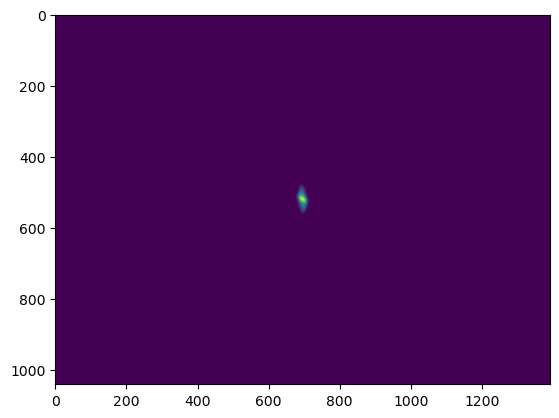

In [6]:

# i don't think beam_meaurement.measure() is working in particular the image processing.
img = res.processed_images[0]
plt.imshow(img)
print(res)
#plot_image_projection_fit(res)


(<Figure size 400x900 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

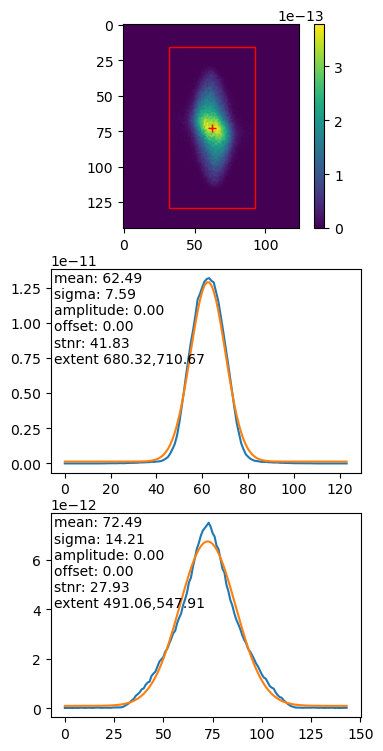

In [7]:
res2 = beam_measurement.beam_fit.fit_image(img)
plot_image_projection_fit(res2)

In [8]:
#screen.image

#beam_measurement.device.image

In [9]:
res = quadscanemit.measure()

CAC: error = "No route to host" sending UDP msg to 169.254.255.255:5064
CAC: error = "Host is down" sending UDP msg to 169.254.255.255:5064
/Users/cgarnier/anaconda3/envs/epics-cheetah/lib/python3.11/site-packages/ml_tto/automatic_emittance/image_projection_fit.py:187: UserWarning: Projection in x had a low amplitude relative to noise
  warnings.warn(
/Users/cgarnier/anaconda3/envs/epics-cheetah/lib/python3.11/site-packages/ml_tto/automatic_emittance/image_projection_fit.py:206: UserWarning: Projection in x was off the screen, fit cannot be trusted
  warnings.warn(
CAC: ok sending UDP msg to 169.254.255.255:5064
/Users/cgarnier/anaconda3/envs/epics-cheetah/lib/python3.11/site-packages/lcls_tools/common/data/model_general_calcs.py:149: RuntimeWarning: divide by zero encountered in divide
  np.nan_to_num(1.0 / sqrt_k) * np.sin(sqrt_k * q_len) * (k > 0)
/Users/cgarnier/anaconda3/envs/epics-cheetah/lib/python3.11/site-packages/lcls_tools/common/data/model_general_calcs.py:150: RuntimeWarni

(<Figure size 400x600 with 2 Axes>,
 array([<Axes: xlabel='Quadrupole Strength [T/m]', ylabel='Beam size [um]'>,
        <Axes: xlabel='Quadrupole Strength [T/m]', ylabel='bmag'>],
       dtype=object))

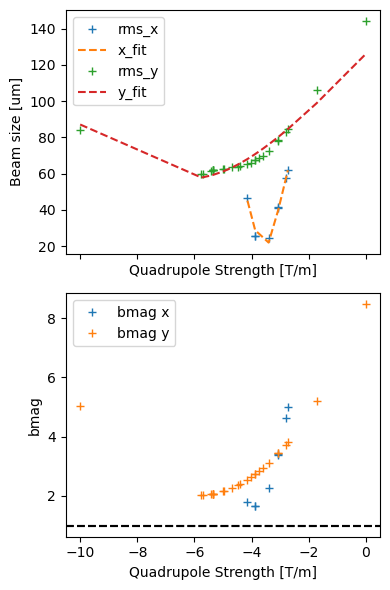

In [10]:
from lcls_tools.common.frontend.plotting.emittance import plot_quad_scan_result
plot_quad_scan_result(res)

/Users/cgarnier/anaconda3/envs/epics-cheetah/lib/python3.11/site-packages/xopt/generators/bayesian/custom_botorch/constrained_acquisition.py:90: UserWarning: The base acquisition function has negative values and a softplus transformation will be applied. This may cause numerical issues for large negative values.
  warnings.warn(


(<Figure size 600x800 with 4 Axes>,
 array([[<Axes: ylabel='scaled_y_rms_px'>],
        [<Axes: ylabel='min_signal_to_noise_ratio'>],
        [<Axes: ylabel='scaled_x_rms_px'>],
        [<Axes: xlabel='k', ylabel='$\\exp[ \\alpha]$'>]], dtype=object))

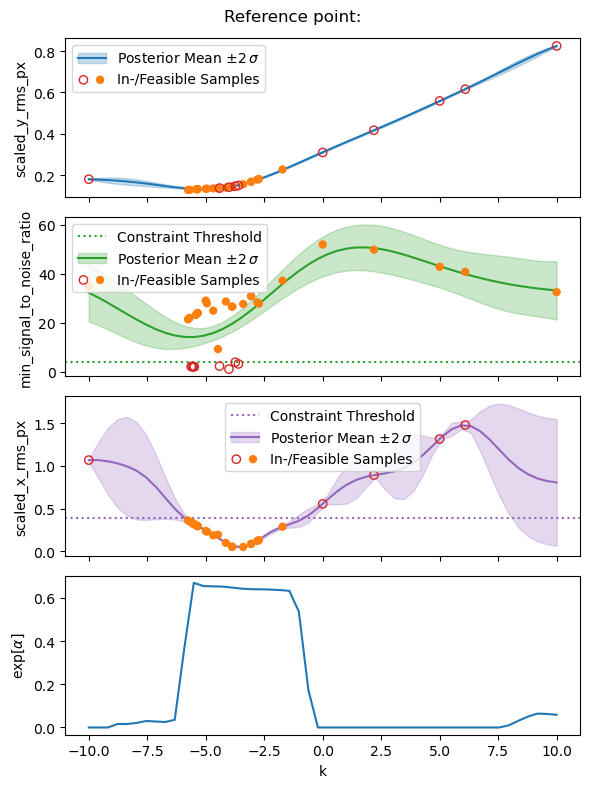

In [11]:
quadscanemit.X.generator.visualize_model()

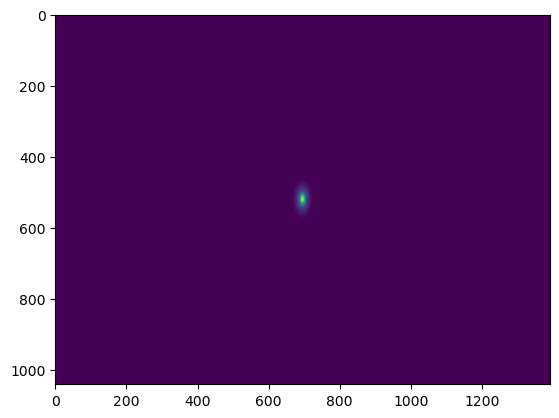

In [12]:
plt.imshow(screen.image)

(<Figure size 400x900 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

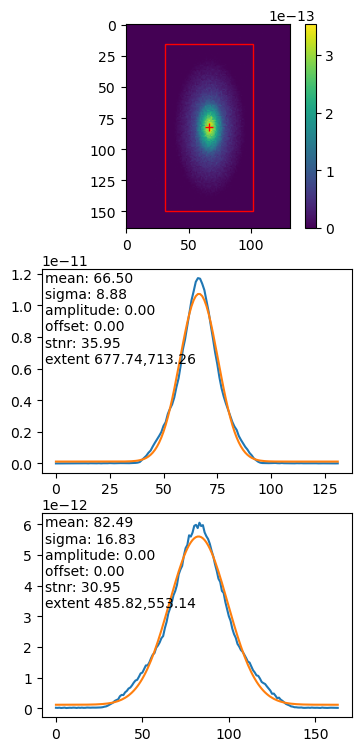

In [13]:
res2 = beam_measurement.beam_fit.fit_image(screen.image)
plot_image_projection_fit(res2)


#TODO: scale image amplitude value
#TODO: add reset pv -> reloads lattice from scratch
#TODO: 

In [14]:
res.emittance*(1e-6)

array([[1.11762177e-09],
       [9.26572967e-10]])

In [15]:
epics.caget('VIRT:BEAM:EMITTANCES',use_monitor=False)

array([1.72149839e-09, 1.72656300e-09])

In [16]:
epics.caput('QUAD:IN20:525:BCTRL', 5)

1

In [17]:
epics.caget('QUAD:IN20:525:BCTRL', use_monitor=False)

4.999999995455284

In [18]:
epics.caput('VIRT:BEAM:RESET_SIM',1)

1

In [19]:
#lattice is defaulted to -3.05
epics.caget('QUAD:IN20:525:BCTRL', use_monitor=False)

-3.057574757690499

In [20]:
epics.caget('VIRT:BEAM:EMITTANCES',use_monitor=False)

array([1.72149839e-09, 1.72656300e-09])